In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

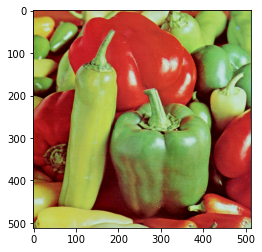

In [3]:
A = imread('../data/peppers-large.tiff')
plt.imshow(A)
plt.show()

In [4]:
x = np.reshape(A, (-1,3))

In [5]:
def kmeans(x, k):
    """
    input:
        x: (m,n)
        k: cluster centoid number
    return:
        c: (m,) clustered data label
    """
    m, n = x.shape
    min_iter = 30
    max_iter = 1000
    mu = np.zeros((k,n))
    l = np.zeros((m,k))
    c = np.zeros(m)
    it = 0
    converged = False
    
    # init mu
    mu = x[np.random.choice(range(m), k, replace=False)]
    norms = np.linalg.norm(x.reshape((m,1,n)) - mu, ord=2, axis=-1)
    c = np.argmin(norms, axis=1)
    while it<min_iter or (it<max_iter and not converged):
    #while it<5:
        old_c = c
        # assign fake label
        norms = np.linalg.norm(x.reshape((m,1,n)) - mu, ord=2, axis=-1)
        c = np.argmin(norms, axis=1)
        # update mu
        idx = (c.reshape((m,1)) == np.arange(k)).astype(int)
        mu = idx.T @ x / idx.sum(axis=0).reshape((k,1)).astype(int)
        it += 1
        converged = np.all(old_c == c)
    print(f"iteration:{it}")
    return mu,c

In [6]:
k = 16
mu, y = kmeans(x, k)

iteration:85


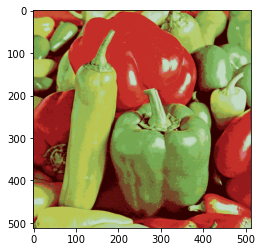

In [7]:
plt.imshow((mu[y].astype(int)).reshape(A.shape))